<a href="https://colab.research.google.com/github/tobinw23/2023-baseball-project/blob/main/Beat_Marcel_Proejct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)
data = read_csv("https://huggingface.co/spaces/rkarthur/sabr3evaluation/raw/main/data/SABR3_Final_Assignment_data.csv")
head(data)
write_csv(data, "testing_data.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 167 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): bbref_id
dbl (9): Age, PA1, PA2, PA3, PA4, OPSY1, OPSY2, OPSY3, OPSY4

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


bbref_id,Age,PA1,PA2,PA3,PA4,OPSY1,OPSY2,OPSY3,OPSY4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
abreujo02,33,262,693,553,675,0.987,0.8340000,0.798,0.906
adriaeh01,30,101,236,366,186,0.557,0.7650000,0.680,0.707
aguilje01,30,216,738,566,311,0.809,0.7135691,0.890,0.837
ahmedni01,30,217,625,564,178,0.729,0.7530000,0.700,0.717
albieoz01,23,124,702,684,244,0.773,0.8520000,0.757,0.810
alfarjo01,27,100,465,377,114,0.624,0.7360000,0.731,0.874


In [ ]:
summary(data)

   bbref_id              Age             PA1             PA2        
 Length:167         Min.   :23.00   Min.   :100.0   Min.   : 130.0  
 Class :character   1st Qu.:27.00   1st Qu.:152.0   1st Qu.: 423.5  
 Mode  :character   Median :29.00   Median :205.0   Median : 549.0  
                    Mean   :29.56   Mean   :196.2   Mean   : 534.3  
                    3rd Qu.:31.00   3rd Qu.:231.0   3rd Qu.: 651.0  
                    Max.   :40.00   Max.   :500.0   Max.   :1328.0  
      PA3              PA4             OPSY1            OPSY2       
 Min.   : 113.0   Min.   : 107.0   Min.   :0.4800   Min.   :0.5510  
 1st Qu.: 428.0   1st Qu.: 361.5   1st Qu.:0.6790   1st Qu.:0.7395  
 Median : 542.0   Median : 529.0   Median :0.7630   Median :0.8000  
 Mean   : 543.6   Mean   : 494.6   Mean   :0.7636   Mean   :0.8098  
 3rd Qu.: 632.0   3rd Qu.: 631.0   3rd Qu.:0.8410   3rd Qu.:0.8785  
 Max.   :1418.0   Max.   :1270.0   Max.   :1.1020   Max.   :1.1000  
     OPSY3            OPSY4       

In [ ]:
data1<- data %>%
  mutate(OPS_nextyear=(((data$OPSY1*5)+(data$OPSY2*4)+(data$OPSY3*2))/(12)))
data1

bbref_id,Age,PA1,PA2,PA3,PA4,OPSY1,OPSY2,OPSY3,OPSY4,OPS_nextyear
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
abreujo02,33,262,693,553,675,0.987,0.8340000,0.7980000,0.9060000,0.8222500
adriaeh01,30,101,236,366,186,0.557,0.7650000,0.6800000,0.7070000,0.6004167
aguilje01,30,216,738,566,311,0.809,0.7135691,0.8900000,0.8370000,0.7232730
ahmedni01,30,217,625,564,178,0.729,0.7530000,0.7000000,0.7170000,0.6714167
albieoz01,23,124,702,684,244,0.773,0.8520000,0.7570000,0.8100000,0.7322500
alfarjo01,27,100,465,377,114,0.624,0.7360000,0.7310000,0.8740000,0.6271667
altuvjo01,30,210,548,599,662,0.629,0.9030000,0.8370000,0.9570000,0.7025833
anderti01,27,221,518,606,606,0.886,0.8650000,0.6870000,0.6790000,0.7720000
andruel01,31,111,648,428,689,0.582,0.7070000,0.6750000,0.8080000,0.5906667


In [ ]:
data1 <- data %>%
  mutate(OPS_next_year=(((data$OPSY1*5)+(data$OPSY2*4)+(data$OPSY3*2))/(12)))%>%
  mutate(reliability= (data$PA1+data$PA2+data$PA3+data$PA4)/((data$PA1+data$PA2+data$PA3+data$PA4)+1200))%>%
  mutate(Regressed_Rate= (reliability*((OPSY1+OPSY2+OPSY3+OPSY4)/4)+((1-reliability)*.720)))%>%
  mutate(Age_adjustment =ifelse(data1$Age>29,round(((data1$Age-29)*.003),3),round(((data1$Age-29)*.006)))) %>%
  mutate(MARCEL_OPS = ((1+Age_adjustment)*(Regressed_Rate)))
data1

bbref_id,Age,PA1,PA2,PA3,PA4,OPSY1,OPSY2,OPSY3,OPSY4,OPS_next_year,reliability,Regressed_Rate,Age_adjustment,MARCEL_OPS
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
abreujo02,33,262,693,553,675,0.987,0.8340000,0.7980000,0.9060000,0.8222500,0.6452852,0.8240522,0.012,0.8339409
adriaeh01,30,101,236,366,186,0.557,0.7650000,0.6800000,0.7070000,0.6004167,0.4255625,0.7018072,0.003,0.7039126
aguilje01,30,216,738,566,311,0.809,0.7135691,0.8900000,0.8370000,0.7232730,0.6040911,0.7758133,0.003,0.7781408
ahmedni01,30,217,625,564,178,0.729,0.7530000,0.7000000,0.7170000,0.6714167,0.5689655,0.7227026,0.003,0.7248707
albieoz01,23,124,702,684,244,0.773,0.8520000,0.7570000,0.8100000,0.7322500,0.5937712,0.7663142,0.000,0.7663142
alfarjo01,27,100,465,377,114,0.624,0.7360000,0.7310000,0.8740000,0.6271667,0.4680851,0.7299468,0.000,0.7299468
altuvjo01,30,210,548,599,662,0.629,0.9030000,0.8370000,0.9570000,0.7025833,0.6272134,0.7899343,0.003,0.7923041
anderti01,27,221,518,606,606,0.886,0.8650000,0.6870000,0.6790000,0.7720000,0.6191685,0.7566857,0.000,0.7566857
andruel01,31,111,648,428,689,0.582,0.7070000,0.6750000,0.8080000,0.5906667,0.6098830,0.7035332,0.006,0.7077544


In [ ]:
data4 <- data1 %>%
  group_by(bbref_id) %>%
  mutate(PA_nextyear= ((PA2*5)+(PA3*4)+(PA4*3))/12) %>%
  mutate(weighted_OPS= weighted.mean(OPS_next_year, PA_nextyear, na.rm=T)) %>%
  mutate(previous_OPS = lag(weighted_OPS, 0))
data4 %>% head()

bbref_id,Age,PA1,PA2,PA3,PA4,OPSY1,OPSY2,OPSY3,OPSY4,OPS_next_year,reliability,Regressed_Rate,Age_adjustment,MARCEL_OPS,PA_nextyear,weighted_OPS,previous_OPS
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
abreujo02,33,262,693,553,675,0.987,0.8340000,0.798,0.906,0.8222500,0.6452852,0.8240522,0.012,0.8339409,641.8333,0.8222500,0.8222500
adriaeh01,30,101,236,366,186,0.557,0.7650000,0.680,0.707,0.6004167,0.4255625,0.7018072,0.003,0.7039126,266.8333,0.6004167,0.6004167
aguilje01,30,216,738,566,311,0.809,0.7135691,0.890,0.837,0.7232730,0.6040911,0.7758133,0.003,0.7781408,573.9167,0.7232730,0.7232730
ahmedni01,30,217,625,564,178,0.729,0.7530000,0.700,0.717,0.6714167,0.5689655,0.7227026,0.003,0.7248707,492.9167,0.6714167,0.6714167
albieoz01,23,124,702,684,244,0.773,0.8520000,0.757,0.810,0.7322500,0.5937712,0.7663142,0.000,0.7663142,581.5000,0.7322500,0.7322500
alfarjo01,27,100,465,377,114,0.624,0.7360000,0.731,0.874,0.6271667,0.4680851,0.7299468,0.000,0.7299468,347.9167,0.6271667,0.6271667


In [ ]:
our_model = lm(OPS_next_year ~ OPSY1, data = data1)
test_data <- data4 %>%
  select(bbref_id, OPSY1, OPS_next_year, MARCEL_OPS)

In [ ]:
test_data$BETTER_THAN_MARCEL_OPS <- predict(our_model, test_data)
test_data

bbref_id,OPSY1,OPS_next_year,MARCEL_OPS,BEATMARCEL_OPS,BETTER_THAN_MARCEL_OPS
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
abreujo02,0.987,0.8222500,0.8339409,0.8376046,0.8376046
adriaeh01,0.557,0.6004167,0.7039126,0.6038412,0.6038412
aguilje01,0.809,0.7232730,0.7781408,0.7408374,0.7408374
ahmedni01,0.729,0.6714167,0.7248707,0.6973466,0.6973466
albieoz01,0.773,0.7322500,0.7663142,0.7212665,0.7212665
alfarjo01,0.624,0.6271667,0.7299468,0.6402648,0.6402648
altuvjo01,0.629,0.7025833,0.7923041,0.6429830,0.6429830
anderti01,0.886,0.7720000,0.7566857,0.7826974,0.7826974
andruel01,0.582,0.5906667,0.7077544,0.6174321,0.6174321


In [ ]:
summary(lm(BETTER_THAN_MARCEL_OPS ~ MARCEL_OPS, data = test_data))


Call:
lm(formula = BETTER_THAN_MARCEL_OPS ~ MARCEL_OPS, data = test_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.143655 -0.034153 -0.004363  0.032564  0.136027 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01015    0.06194   0.164     0.87    
MARCEL_OPS   0.92519    0.08102  11.419   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04916 on 165 degrees of freedom
Multiple R-squared:  0.4414,	Adjusted R-squared:  0.438 
F-statistic: 130.4 on 1 and 165 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


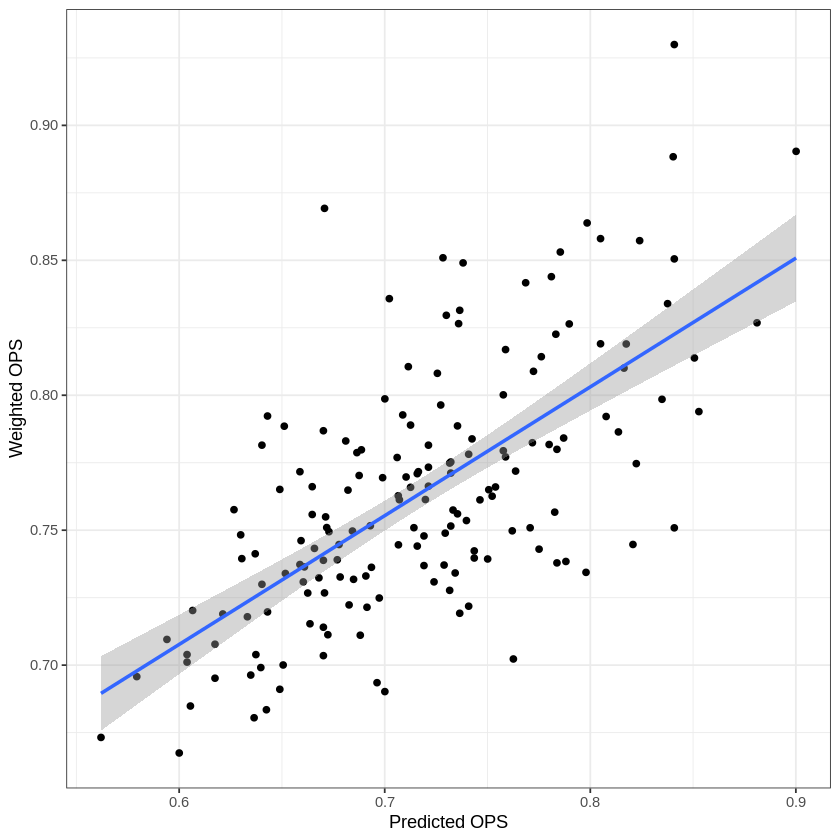

In [ ]:
test_data %>%
  ggplot(aes(x=BETTER_THAN_MARCEL_OPS, y=MARCEL_OPS)) +
  geom_point() +
  geom_smooth (method= 'lm') +
  theme_bw() +
  xlab("Predicted OPS") +
  ylab("Weighted OPS")

In [ ]:
cor(test_data$BETTER_THAN_MARCEL_OPS, test_data$MARCEL_OPS)

[1] 0.6643905

In [ ]:
write_csv(test_data, "Better_Than_MARCEL_OPS.csv")